# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [247]:
df = pd.read_csv('../data/states_edu.csv')
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [248]:
df.shape

(1715, 25)

In [249]:
# looking at columns we have
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [250]:
# I liked how they were renamed in the example, so I'm going to use that too
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df


,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


In [251]:
# drop the null
df.dropna()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,10115.0,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76207.0,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,34070.0,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


In [252]:
# Drop any one where the reading score for 4th grade doesn't exist
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)
df


,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


In [253]:
# I wanted to have the index as the state so it's easier to look at

df_02 = df.set_index('STATE')
df_02



,PRIMARY_KEY,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
STATE,,,,,,,,,,,,,,,,,,,,,
ALABAMA,1992_ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
ARIZONA,1992_ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
ARKANSAS,1992_ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
CALIFORNIA,1992_CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
COLORADO,1992_COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,1035970.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIRGINIA,2019_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
WASHINGTON,2019_WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
WEST_VIRGINIA,2019_WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0


<h2>Exploratory Data Analysis (EDA) </h2>

How many years of data are logged in our dataset? 

In [254]:
print(df["YEAR"].nunique())
print(df["YEAR"].unique())

14
[1992 1994 1998 2002 2003 2005 2007 2009 2011 2013 2015 2017 2000 2019]


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [255]:
# going to use the original database with all the states = df

df_04 = df.loc[(df['STATE'] == "MICHIGAN")]
df_04
df_05 = df_04["AVG_READING_4_SCORE"].mean().round(3)
print("Average Grade 4 Reading Score for Michigan = ", df_05)

df_06 = df.loc[(df['STATE'] == "OHIO")]
df_06
df_07 = df_06["AVG_READING_4_SCORE"].mean().round(3)
print("Average Grade 4 Reading Score for Ohio = ", df_07)

if (df_05) > (df_07):
    print("Michigan has a higher grade 4 reading level across all years.")
elif (df_07) > (df_05):
    print("Ohio has a higher grade 4 reading level across all years.")



Average Grade 4 Reading Score for Michigan =  217.833
Average Grade 4 Reading Score for Ohio =  223.182
Ohio has a higher grade 4 reading level across all years.


Find the average for your outcome score across all states in 2019

In [256]:
df_08 = df.set_index('YEAR')
df_08

df_09 = df.loc[(df["YEAR"] == 2019)]
df_09

df_10 = df_09["AVG_READING_4_SCORE"].mean().round(3)
print("The average grade 4 reading level across all states in 2019 is", df_10)

The average grade 4 reading level across all states in 2019 is 219.792


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [257]:
print(df["STATE"].unique())
print(df["STATE"].nunique())

['ALABAMA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO' 'CONNECTICUT'
 'DELAWARE' 'DISTRICT_OF_COLUMBIA' 'FLORIDA' 'GEORGIA' 'HAWAII' 'IDAHO'
 'INDIANA' 'IOWA' 'KENTUCKY' 'LOUISIANA' 'MAINE' 'MARYLAND'
 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA' 'MISSISSIPPI' 'MISSOURI'
 'NEBRASKA' 'NEW_HAMPSHIRE' 'NEW_JERSEY' 'NEW_MEXICO' 'NEW_YORK'
 'NORTH_CAROLINA' 'NORTH_DAKOTA' 'OHIO' 'OKLAHOMA' 'PENNSYLVANIA'
 'RHODE_ISLAND' 'SOUTH_CAROLINA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VIRGINIA'
 'WEST_VIRGINIA' 'WISCONSIN' 'WYOMING' 'MONTANA' 'WASHINGTON' 'KANSAS'
 'NEVADA' 'OREGON' 'VERMONT' 'ALASKA' 'ILLINOIS' 'SOUTH_DAKOTA' 'NATIONAL'
 'DODEA']
53


In [258]:
states = df.groupby("STATE")
states

In [259]:
print("The average grade 4 reading scores of all states are as follows:")
states["AVG_READING_4_SCORE"].mean().round(3)

The average grade 4 reading scores of all states are as follows:


STATE
ALABAMA                 212.615
ALASKA                  209.889
ARIZONA                 210.231
ARKANSAS                214.692
CALIFORNIA              208.231
COLORADO                222.667
CONNECTICUT             227.000
DELAWARE                220.385
DISTRICT_OF_COLUMBIA    197.000
DODEA                   228.636
FLORIDA                 219.385
GEORGIA                 216.231
HAWAII                  210.154
IDAHO                   221.000
ILLINOIS                218.667
INDIANA                 222.250
IOWA                    222.538
KANSAS                  222.000
KENTUCKY                220.846
LOUISIANA               207.231
MAINE                   224.385
MARYLAND                220.846
MASSACHUSETTS           231.231
MICHIGAN                217.833
MINNESOTA               222.923
MISSISSIPPI             207.769
MISSOURI                220.538
MONTANA                 224.000
NATIONAL                218.929
NEBRASKA                222.500
NEVADA                  211.364
NE

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [260]:
# I'm going to create a new column that shows the percent of instruction expenditure compared to the total expenditure


df["PERCENT_EXPENDITURE_ON_INSTRUCTION"] = df["INSTRUCTION_EXPENDITURE"] / df["TOTAL_EXPENDITURE"]*100
df

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,PERCENT_EXPENDITURE_ON_INSTRUCTION
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,55.833300
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,42.212972
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,55.324775
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,52.909138
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,50.307918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0,NaN
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0,NaN
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0,NaN
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0,NaN


In [261]:
# I'm going to create a new column that shows the percent of enrollment for high school compared to total enrollment


df["PERCENT_HS_ENROLL"] = df["ENROLL_HS"] / df["ENROLL_ALL"]*100
df

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,PERCENT_EXPENDITURE_ON_INSTRUCTION,PERCENT_HS_ENROLL
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,55.833300,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,42.212972,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,55.324775,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,52.909138,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,50.307918,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0,NaN,NaN
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0,NaN,NaN
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0,NaN,NaN
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0,NaN,NaN


In [262]:
# I want to specifically look at the three biggest states data - California, Texas, and Alaska

df_03 = df.loc[(df['STATE'] == "CALIFORNIA") | (df['STATE'] == "TEXAS") | (df['STATE'] == "ALASKA")]
df_03



,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,PERCENT_EXPENDITURE_ON_INSTRUCTION,PERCENT_HS_ENROLL
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,52.909138,NaN
43,1992_TEXAS,TEXAS,1992,NaN,16264180.0,1160185.0,6706959.0,8397036.0,16119084.0,7961379.0,...,180206.0,NaN,NaN,3541769.0,218.0,265.0,213.0,NaN,49.391014,NaN
106,1994_CALIFORNIA,CALIFORNIA,1994,4120498.0,23440845.0,2095878.0,13175550.0,8169417.0,23012688.0,12443864.0,...,285132.0,NaN,NaN,5407475.0,NaN,NaN,197.0,NaN,54.073927,NaN
145,1994_TEXAS,TEXAS,1994,3601627.0,19713604.0,1456330.0,8569649.0,9687625.0,19224149.0,9814470.0,...,183737.0,NaN,NaN,3677171.0,NaN,NaN,212.0,NaN,51.052819,NaN
310,1998_CALIFORNIA,CALIFORNIA,1998,5727224.0,39183018.0,3149260.0,22840500.0,13193258.0,38087666.0,20083913.0,...,334852.0,3666271.0,1627284.0,5926037.0,NaN,NaN,202.0,252.0,52.730753,27.459903
349,1998_TEXAS,TEXAS,1998,3888061.0,24485263.0,1830474.0,10632566.0,12022223.0,25723965.0,12804069.0,...,212503.0,2440832.0,1077158.0,3945367.0,NaN,NaN,214.0,261.0,49.774866,27.301845
514,2002_CALIFORNIA,CALIFORNIA,2002,6136915.0,54727056.0,5084409.0,31005317.0,18637330.0,56464225.0,28593157.0,...,385181.0,3917027.0,1807054.0,6353667.0,NaN,NaN,206.0,250.0,50.639422,28.441119
553,2002_TEXAS,TEXAS,2002,4112315.0,32802734.0,2941562.0,12930564.0,16930608.0,35668486.0,16826484.0,...,238882.0,2580635.0,1180158.0,4259823.0,NaN,NaN,217.0,262.0,47.174652,27.704391
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0,47.415402,30.043380
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0,49.475514,28.914195


In [263]:
# I did these steps in "data cleanup" at first which is why the df numbers are a bit off

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

I wanted to look at the three biggest states to see their reading grade levels. I specifically wanted to look at their budgets and how much they spend on instruction to see if the amount of money spent on teachers affects the students academic outcomes. In this case, I am targeting reading scores at grade 4 for my analyzation. I also looked at enrollment for high school as a percentage of total enrollment. 

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 0** - I practiced with some first to get a feel for the data!

<Axes: title={'center': 'Distribution of 4th Grade Reading Scores for CA, TX, and AK'}, ylabel='Frequency'>

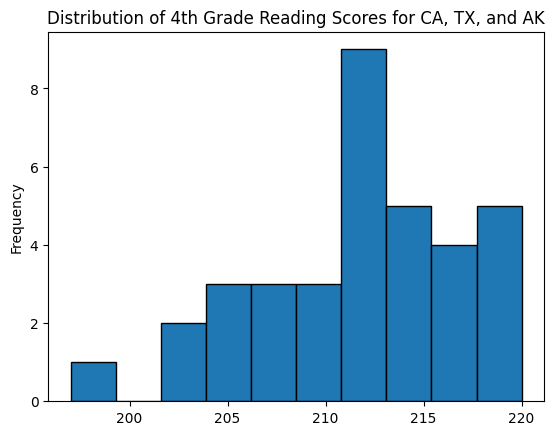

In [264]:
df_03.AVG_READING_4_SCORE.plot.hist(title="Distribution of 4th Grade Reading Scores for CA, TX, and AK", edgecolor="black")

Text(0.5, 1.0, '4th Grade Reading Score Over Time for CA, TX, and AK')

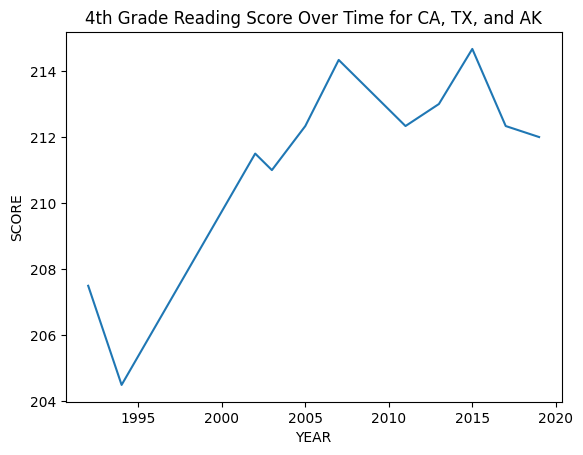

In [265]:
df_03.groupby('YEAR')["AVG_READING_4_SCORE"].mean().plot()
plt.ylabel('SCORE')
plt.title('4th Grade Reading Score Over Time for CA, TX, and AK')

<Axes: title={'center': 'Percent of Total Expenditure on Instruction for CA, TX, and AK'}, xlabel='STATE'>

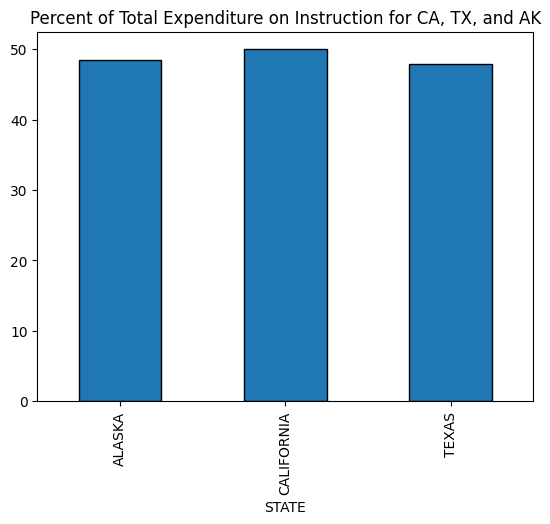

In [266]:

barplot = df_03.groupby('STATE')["PERCENT_EXPENDITURE_ON_INSTRUCTION"].mean().plot.bar(title="Percent of Total Expenditure on Instruction for CA, TX, and AK", edgecolor="black")
barplot

**The above plots show the distribution for reading scores at a 4th grade level, 4th grade reading score over time, and the percent of the total expenditure spent on instruction respectively for the three biggest states in the US, California, Texas, and Alaska.**

**Visualization 1**

Text(0, 0.5, '4th Grade Reading Score')

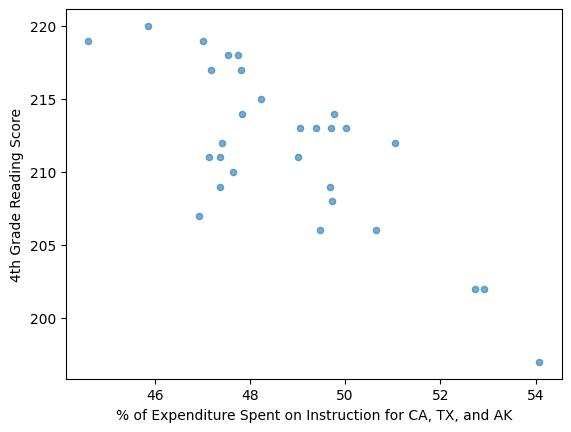

In [286]:
df_03.plot.scatter(x='PERCENT_EXPENDITURE_ON_INSTRUCTION', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('% of Expenditure Spent on Instruction for CA, TX, and AK')
plt.ylabel('4th Grade Reading Score')

Text(0, 0.5, '4th Grade Reading Score')

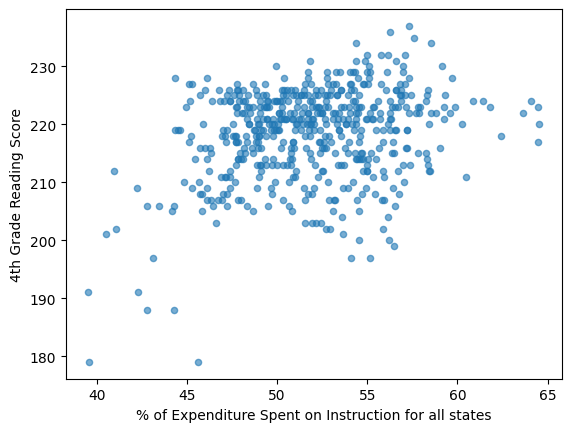

In [287]:
df.plot.scatter(x='PERCENT_EXPENDITURE_ON_INSTRUCTION', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('% of Expenditure Spent on Instruction for all states')
plt.ylabel('4th Grade Reading Score')

**I was interested that we found a negative correlation with the 3 biggest states, so I did it again with the full data set. The above shows a positive correlation when all states are taken into account.**

**Visualization 2**

Text(0, 0.5, '4th Grade Reading Score')

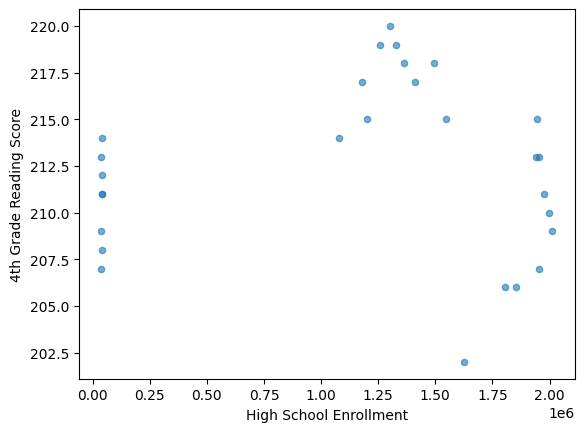

In [268]:
df_03.plot.scatter(x='ENROLL_HS', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('High School Enrollment')
plt.ylabel('4th Grade Reading Score')

**The above visualization compares the average 4th grade reading score to the enrollment in high school. There seems to be little to no correlation between 4th grade reading scores and enrollment in high school in California, Texas, and Alaska.**

After looking at the data, there are not a lot of points for just the three states CA, TX, and AK to accurately train a model. For data creation and machine learning, I'll look at the data set as a whole, not just those 3 states

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [269]:
from sklearn.model_selection import train_test_split

In [270]:
# I'm going to look at Instruction Expenditure, Percent spent on Instruction, and State Revenue

X = df[['INSTRUCTION_EXPENDITURE','TOTAL_EXPENDITURE','STATE_REVENUE', 'PERCENT_EXPENDITURE_ON_INSTRUCTION']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']

In [271]:
# I'll use the median for the left skew to look at it

y.fillna(y.median(), inplace=True)

In [272]:
# Using 80/20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [273]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [274]:
# create your model here
model = LinearRegression()

In [275]:
model.fit(X_train, y_train)

LinearRegression()

In [276]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [277]:
# R^2
model.score(X_test, y_test)

0.0345043267188021

In [278]:
#coeff & intercepts
print(model.intercept_)
print(model.coef_)

184.6268856697107
[-8.06734388e-07  1.00199201e-06 -1.24681919e-06  6.54319750e-01]


In [279]:
# mean error
np.mean(model.predict(X_test)-y_test)


1.9255007568215963

In [280]:
# root mean sq error
np.mean((model.predict(X_test)-y_test)**2)**0.5


7.922824175669052

In [281]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

6.130491793306531

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

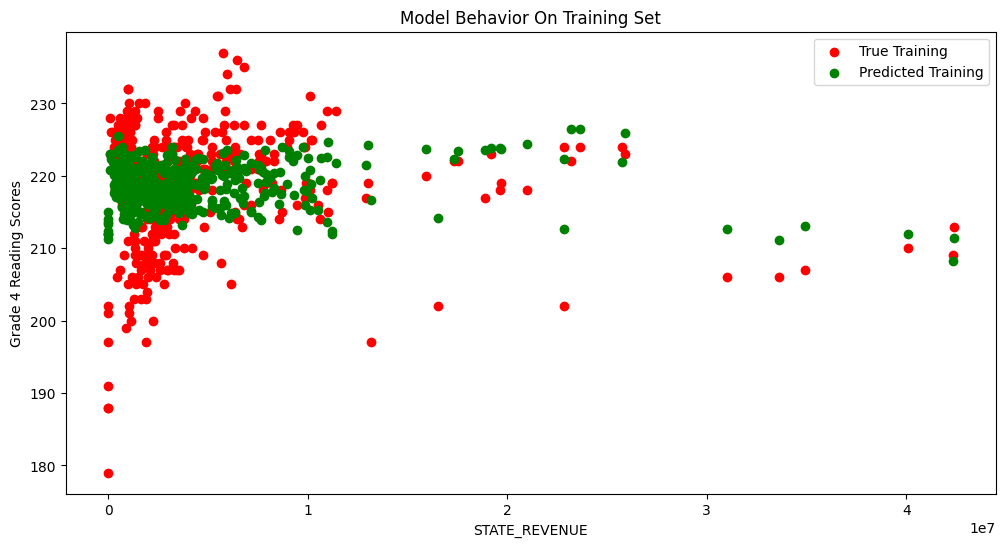

In [282]:
col_name = 'STATE_REVENUE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Grade 4 Reading Scores')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

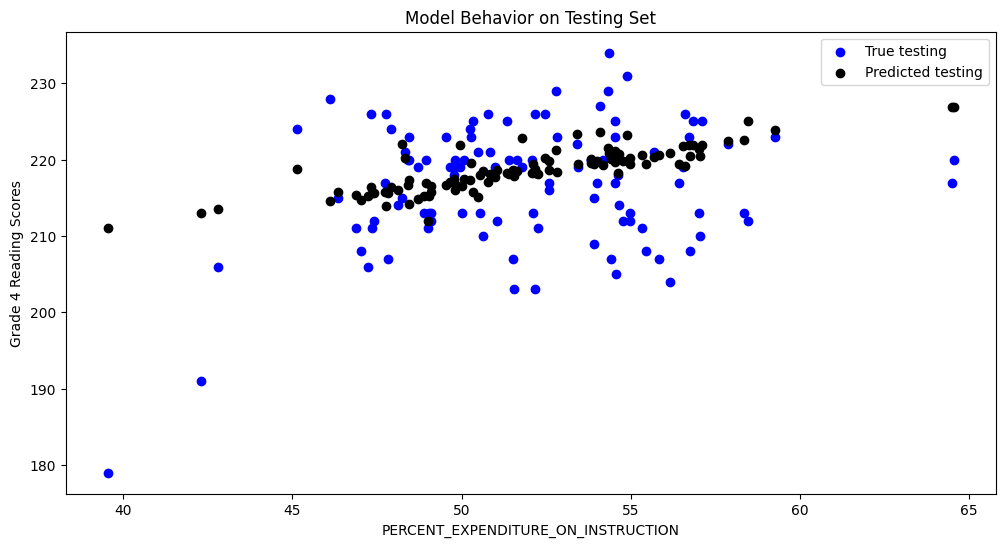

In [284]:
col_name = 'PERCENT_EXPENDITURE_ON_INSTRUCTION'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Grade 4 Reading Scores')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**


I wanted to look at the amount of money that states spend on school, and if it would affect the academic performance of students. At first, I wanted to look at the 3 biggest states (California, Alaska, and Texas). After running the data visualization, I realized that there were not enough data points to train the model and that I would have to use the big set. It is interesting, however, I found a negative correlation between percent of the expenditure spent on instruction in the three biggest states, but a positive correlation when all states were factored in. The model does seem to be working correctly and is fairly accurate as given by its performance metrics. It looks like the predicted testing is a little more accurate than the actual test on both models, but overall, I would say it works well at predicting and testing the data. 

In [288]:
# Before this, I had never coded before, so this was very fun to learn and figure out!